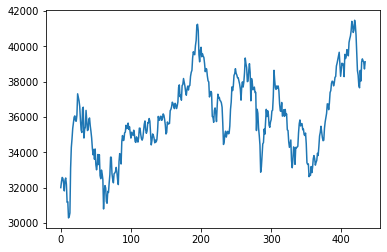

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('NSEBANK.csv')
df = df[800:]
df1=df.reset_index()['Close']
df2=df.reset_index()['Open']
df3=df.reset_index()['High']
df4=df.reset_index()['Low']
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler(feature_range=(0,1))
scaler2=MinMaxScaler(feature_range=(0,1))
scaler3=MinMaxScaler(feature_range=(0,1))
scaler4=MinMaxScaler(feature_range=(0,1))
df1=scaler1.fit_transform(np.array(df1).reshape(-1,1))
df2=scaler2.fit_transform(np.array(df2).reshape(-1,1))
df3=scaler3.fit_transform(np.array(df3).reshape(-1,1))
df4=scaler4.fit_transform(np.array(df4).reshape(-1,1))

training_size=int(len(df1)*0.65) #len(df1) = len(df2) = ...
test_size=len(df1)-training_size
train_data_close,test_data_close=df1[0:training_size,:],df1[training_size:len(df1),:1]
train_data_open,test_data_open=df2[0:training_size,:],df2[training_size:len(df2),:1]
train_data_high,test_data_high=df3[0:training_size,:],df3[training_size:len(df3),:1]
train_data_low,test_data_low=df4[0:training_size,:],df4[training_size:len(df4),:1]

training_size,test_size

(282, 153)

In [ ]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


time_step = 50
X_train_C, y_train_C = create_dataset(train_data_close, time_step)
X_test_C, ytest_C = create_dataset(test_data_close, time_step)

X_train_C =X_train_C.reshape(X_train_C.shape[0],X_train_C.shape[1] , 1)
X_test_C = X_test_C.reshape(X_test_C.shape[0],X_test_C.shape[1] , 1)

X_train_O, y_train_O = create_dataset(train_data_open, time_step)
X_test_O, ytest_O = create_dataset(test_data_open, time_step)

X_train_O =X_train_O.reshape(X_train_O.shape[0],X_train_O.shape[1] , 1)
X_test_O = X_test_O.reshape(X_test_O.shape[0],X_test_O.shape[1] , 1)

X_train_H, y_train_H = create_dataset(train_data_high, time_step)
X_test_H, ytest_H = create_dataset(test_data_high, time_step)

X_train_H =X_train_H.reshape(X_train_H.shape[0],X_train_H.shape[1] , 1)
X_test_H = X_test_H.reshape(X_test_H.shape[0],X_test_H.shape[1] , 1)

X_train_L, y_train_L = create_dataset(train_data_low, time_step)
X_test_L, ytest_L = create_dataset(test_data_low, time_step)

X_train_L =X_train_L.reshape(X_train_L.shape[0],X_train_L.shape[1] , 1)
X_test_L = X_test_L.reshape(X_test_L.shape[0],X_test_L.shape[1] , 1)

X_test_C.shape, ytest_C.shape

((102, 50, 1), (102,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

model1.fit(X_train_C,y_train_C,validation_data=(X_test_C,ytest_C),epochs=100,batch_size=64,verbose=1)


model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

model2.fit(X_train_O,y_train_O,validation_data=(X_test_O,ytest_O),epochs=100,batch_size=64,verbose=1)


model3=Sequential()
model3.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model3.add(LSTM(50))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam')

model3.fit(X_train_H,y_train_H,validation_data=(X_test_H,ytest_H),epochs=100,batch_size=64,verbose=1)

model4=Sequential()
model4.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model4.add(LSTM(50))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error',optimizer='adam')

model4.fit(X_train_L,y_train_L,validation_data=(X_test_L,ytest_L),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 5s 387ms/step - loss: 0.1816 - val_loss: 0.0576
Epoch 2/100
4/4 [==============================] - 0s 79ms/step - loss: 0.0208 - val_loss: 0.0400
Epoch 3/100
4/4 [==============================] - 0s 80ms/step - loss: 0.0379 - val_loss: 0.0125
Epoch 4/100
4/4 [==============================] - 0s 89ms/step - loss: 0.0100 - val_loss: 0.0265
Epoch 5/100
4/4 [==============================] - 0s 75ms/step - loss: 0.0176 - val_loss: 0.0295
Epoch 6/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0149 - val_loss: 0.0175
Epoch 7/100
4/4 [==============================] - 0s 73ms/step - loss: 0.0095 - val_loss: 0.0113
Epoch 8/100
4/4 [==============================] - 0s 78ms/step - loss: 0.0112 - val_loss: 0.0113
Epoch 9/100
4/4 [==============================] - 0s 79ms/step - loss: 0.0106 - val_loss: 0.0115
Epoch 10/100
4/4 [==============================] - 0s 78ms/step - loss: 0.0087 - val_loss: 0.0141
Epoch 11/100
4/4 [

In [ ]:
from keras.models import load_model
model1.save('my_model1.h5')
model2.save('my_model2.h5')
model3.save('my_model3.h5')
model4.save('my_model4.h5')

# model1 = load_model('my_model1.h5')
# model2 = load_model('my_model2.h5')
# model3 = load_model('my_model3.h5')
# model4 = load_model('my_model4.h5')

In [ ]:
import tensorflow as tf

train_predict_C=model1.predict(X_train_C)
test_predict_C=model1.predict(X_test_C)
train_predict_C=scaler1.inverse_transform(train_predict_C)
test_predict_C=scaler1.inverse_transform(test_predict_C)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train_C,train_predict_C)), math.sqrt(mean_squared_error(ytest_C,test_predict_C))

4/4 [==============================] - 0s 13ms/step


(36151.22459111484, 36752.100970917636)

In [ ]:
train_predict_O=model2.predict(X_train_O)
test_predict_O=model2.predict(X_test_O)
train_predict_O=scaler2.inverse_transform(train_predict_O)
test_predict_O=scaler2.inverse_transform(test_predict_O)

math.sqrt(mean_squared_error(y_train_O,train_predict_O)), math.sqrt(mean_squared_error(ytest_O,test_predict_O))

4/4 [==============================] - 0s 12ms/step


(36045.090907459016, 36554.137931083)

In [ ]:
train_predict_H=model3.predict(X_train_H)
test_predict_H=model3.predict(X_test_H)
train_predict_H=scaler3.inverse_transform(train_predict_H)
test_predict_H=scaler3.inverse_transform(test_predict_H)

math.sqrt(mean_squared_error(y_train_H,train_predict_H)), math.sqrt(mean_squared_error(ytest_H,test_predict_H))

4/4 [==============================] - 0s 12ms/step


(36516.23535228484, 37086.86252196283)

In [ ]:
train_predict_L=model4.predict(X_train_L)
test_predict_L=model4.predict(X_test_L)
train_predict_L=scaler4.inverse_transform(train_predict_L)
test_predict_L=scaler4.inverse_transform(test_predict_L)

math.sqrt(mean_squared_error(y_train_L,train_predict_L)), math.sqrt(mean_squared_error(ytest_L,test_predict_L))

4/4 [==============================] - 0s 13ms/step


(35734.36805300566, 36338.49545952793)

In [ ]:
look_back=50
trainPredictPlot1 = numpy.empty_like(df1)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[look_back:len(train_predict_C)+look_back, :] = train_predict_C
testPredictPlot1 = numpy.empty_like(df1)
testPredictPlot1[:, :] = numpy.nan
testPredictPlot1[len(train_predict_C)+(look_back*2)+1:len(df1)-1, :] = test_predict_C

In [ ]:
trainPredictPlot2 = numpy.empty_like(df2)
trainPredictPlot2[:, :] = np.nan
trainPredictPlot2[look_back:len(train_predict_O)+look_back, :] = train_predict_O
testPredictPlot2 = numpy.empty_like(df2)
testPredictPlot2[:, :] = numpy.nan
testPredictPlot2[len(train_predict_O)+(look_back*2)+1:len(df2)-1, :] = test_predict_O

In [ ]:
trainPredictPlot3 = numpy.empty_like(df3)
trainPredictPlot3[:, :] = np.nan
trainPredictPlot3[look_back:len(train_predict_H)+look_back, :] = train_predict_H
testPredictPlot3 = numpy.empty_like(df3)
testPredictPlot3[:, :] = numpy.nan
testPredictPlot3[len(train_predict_H)+(look_back*2)+1:len(df3)-1, :] = test_predict_H

In [ ]:
trainPredictPlot4 = numpy.empty_like(df4)
trainPredictPlot4[:, :] = np.nan
trainPredictPlot4[look_back:len(train_predict_L)+look_back, :] = train_predict_L
testPredictPlot4 = numpy.empty_like(df4)
testPredictPlot4[:, :] = numpy.nan
testPredictPlot4[len(train_predict_L)+(look_back*2)+1:len(df4)-1, :] = test_predict_L

In [ ]:
a = test_data_close.shape[0]
a

153

In [ ]:
input_value = a - 50
next_values = 5
x_input=test_data_close[input_value:].reshape(1,-1)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_close=[]
n_steps=50
i=0
while(i<next_values):
    
    if(len(temp_input)>50):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output_close.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_close.extend(yhat.tolist())
        i=i+1

[0.7705869]
51
1 day input [0.68122485 0.69202631 0.68891912 0.6680228  0.68278089 0.71110742
 0.71561871 0.76855266 0.78307813 0.80072406 0.82057883 0.83796559
 0.77803943 0.71650379 0.75226088 0.78273828 0.77489207 0.77814666
 0.71462152 0.82728952 0.80623219 0.81693969 0.85134228 0.83889118
 0.82006015 0.88739452 0.90588116 0.9200357  0.94678    0.99437556
 0.97683232 0.93816922 0.94957842 1.         0.97631818 0.92509675
 0.82813897 0.74498261 0.72199375 0.66840736 0.65838375 0.74638636
 0.69253137 0.78913602 0.80458708 0.79521627 0.7876205  0.7535843
 0.78989605 0.77058691]
1 day output [[0.7525403]]
2 day input [0.69202631 0.68891912 0.6680228  0.68278089 0.71110742 0.71561871
 0.76855266 0.78307813 0.80072406 0.82057883 0.83796559 0.77803943
 0.71650379 0.75226088 0.78273828 0.77489207 0.77814666 0.71462152
 0.82728952 0.80623219 0.81693969 0.85134228 0.83889118 0.82006015
 0.88739452 0.90588116 0.9200357  0.94678    0.99437556 0.97683232
 0.93816922 0.94957842 1.         0.9763

In [ ]:
x_input=test_data_open[input_value:].reshape(1,-1)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_open=[]
n_steps=50
i=0
while(i<next_values):
    
    if(len(temp_input)>50):
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model2.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output_open.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model2.predict(x_input, verbose=0)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output_open.extend(yhat.tolist())
        i=i+1

In [ ]:
x_input=test_data_high[input_value:].reshape(1,-1)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_high=[]
n_steps=50
i=0
while(i<next_values):
    
    if(len(temp_input)>50):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model3.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output_high.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model3.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_high.extend(yhat.tolist())
        i=i+1

[0.77240294]
51
1 day input [0.65711733 0.67823682 0.66845724 0.68280795 0.67565217 0.68900534
 0.69784851 0.74436434 0.75814777 0.78941632 0.79468177 0.81219264
 0.81706698 0.72684901 0.73889629 0.76095219 0.79180284 0.77996639
 0.69733446 0.80365268 0.80902355 0.80271215 0.82638951 0.84472244
 0.80061991 0.86160045 0.89853861 0.89844624 0.91773309 0.98125398
 1.         0.94043043 0.94234239 0.98571523 0.97024818 0.94014027
 0.8846889  0.77049861 0.75477231 0.69484665 0.68733924 0.73371875
 0.71882756 0.76593641 0.80381098 0.77099549 0.77808499 0.76571218
 0.7647586  0.77240294]
1 day output [[0.76161844]]
2 day input [0.67823682 0.66845724 0.68280795 0.67565217 0.68900534 0.69784851
 0.74436434 0.75814777 0.78941632 0.79468177 0.81219264 0.81706698
 0.72684901 0.73889629 0.76095219 0.79180284 0.77996639 0.69733446
 0.80365268 0.80902355 0.80271215 0.82638951 0.84472244 0.80061991
 0.86160045 0.89853861 0.89844624 0.91773309 0.98125398 1.
 0.94043043 0.94234239 0.98571523 0.97024818 

In [ ]:
x_input=test_data_low[input_value:].reshape(1,-1)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_low=[]
n_steps=50
i=0
while(i<next_values):
    
    if(len(temp_input)>50):
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model4.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output_low.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model4.predict(x_input, verbose=0)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output_low.extend(yhat.tolist())
        i=i+1

In [ ]:
final_answer = pd.DataFrame()
final_answer['Close'] = scaler1.inverse_transform(lst_output_close).tolist()
final_answer['Open'] = scaler2.inverse_transform(lst_output_open).tolist()
final_answer['High'] = scaler3.inverse_transform(lst_output_high).tolist()
final_answer['Low'] = scaler4.inverse_transform(lst_output_low).tolist()
final_answer

,Close,Open,High,Low
0,[38902.602111819724],[38178.1918688917],[39251.06165200839],[38956.12070985928]
1,[38700.77325326536],[38138.31992536683],[39128.379819865564],[38882.975580488695]
2,[38446.88866500888],[38044.387858378344],[38986.21090483183],[38721.88724959632]
3,[38156.97016087506],[37923.48441624043],[38829.04561497908],[38485.53144147611]
4,[37848.82738513086],[37789.30103889101],[38664.21093074292],[38191.53510992658]


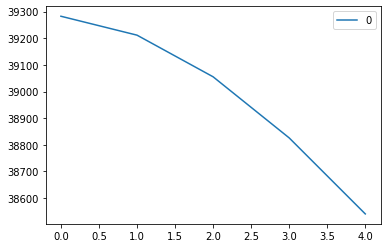

In [ ]:
df5 = scaler1.inverse_transform(lst_output_low)
df5 = pd.DataFrame(df5)
df5.plot()